In [4]:
import pandas as pd
import json
import folium
import plotly.express as px

In [5]:
df = pd.read_csv("medical-facility-location.csv")
df

,자치구,1인당 총 급여,소아청소년과 병원 수,소아청소년과 의원 수,미성년자인구수
0,강남구,81053206.0,10,201,93867
1,서초구,80510746.0,5,141,76176
2,용산구,69795335.0,2,66,27345
3,송파구,55703664.0,4,257,106008
4,성동구,52498140.0,2,114,38125
5,종로구,52233029.0,6,49,17365
6,마포구,51249929.0,1,131,51366
7,중구,49499323.0,3,59,12773
8,양천구,49391500.0,5,101,79006
9,영등포구,47450278.0,6,136,48396


In [6]:
with open("secret_key.json") as f: # path 
    secrets = json.loads(f.read())
    
YOUR_GOOGLE_MAPS_API_KEY = secrets['google_api_key']

In [9]:
geo_path = 'skorea_municipalities_geo_simple.json'
geo_json = json.load(open(geo_path, encoding='utf-8'))

In [52]:
fig = px.choropleth(df, geojson=geo_json, locations='자치구', color='소아청소년과 의원 수', color_continuous_scale='Reds',)
fig.update_geos(fitbounds="locations", visible=False)
fig.update_layout(title_text='행정구역 소아청소년과 의원 수', title_font_size=20)

# mapbox 설정을 통해 크기 조절
fig.update_layout(
    mapbox=dict(
        style="open-street-map",  # mapbox 스타일 설정
        zoom=10,  # 지도 초기 줌 레벨
        center={"lat": 37.5665, "lon": 126.9780},  # 초기 중심 좌표
    )
)

# 플롯 표시
fig.show()

In [51]:
fig = px.choropleth(df, geojson=geo_json, locations='자치구', color='소아청소년과 병원 수', color_continuous_scale='Blues',)
fig.update_geos(fitbounds="locations", visible=False)
fig.update_layout(title_text='행정구역 소아청소년과 병원 수', title_font_size=20)

# mapbox 설정을 통해 크기 조절
fig.update_layout(
    mapbox=dict(
        style="open-street-map",  # mapbox 스타일 설정
        zoom=10,  # 지도 초기 줌 레벨
        center={"lat": 37.5665, "lon": 126.9780},  # 초기 중심 좌표
    )
)

# 플롯 표시
fig.show()

# regression 을 통한 예측값과 실제 의원 개수의 차이 

Mean Squared Error: 1436.614392693839
Root Mean Squared Error: 37.90269637761724
회귀 계수: [0.00171956]
절편: 33.005489586830464


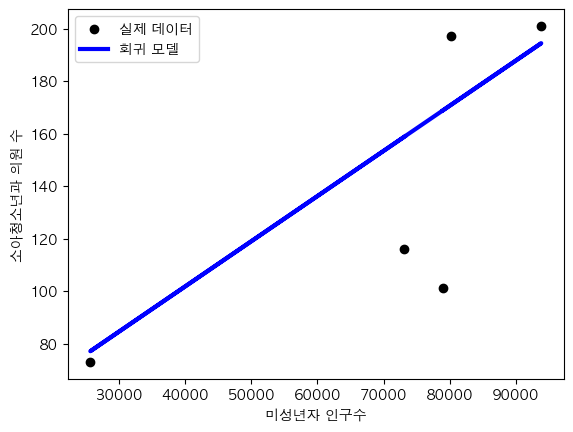

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
plt.rcParams['font.sans-serif']=['AppleGothic']
plt.rcParams['axes.unicode_minus'] = False


X = df[['미성년자인구수']]
y = df['소아청소년과 의원 수']

# 데이터를 훈련 세트와 테스트 세트로 나눔
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 선형 회귀 모델 생성 및 훈련
model = LinearRegression()
model.fit(X_train, y_train)

# 테스트 세트에 대한 예측
y_pred = model.predict(X_test)

# 모델 평가
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Calculate RMSE
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')

# 학습된 모델의 회귀 계수와 절편 확인
print('회귀 계수:', model.coef_)
print('절편:', model.intercept_)

# 시각화
plt.scatter(X_test, y_test, color='black', label='실제 데이터')
plt.plot(X_test, y_pred, color='blue', linewidth=3, label='회귀 모델')
plt.xlabel('미성년자 인구수')
plt.ylabel('소아청소년과 의원 수')
plt.legend()
plt.show()

Mean Squared Error: 6.058297175771098
Root Mean Squared Error: 2.46136083818913
회귀 계수: [3.09045805e-05]
절편: 3.173343081598582


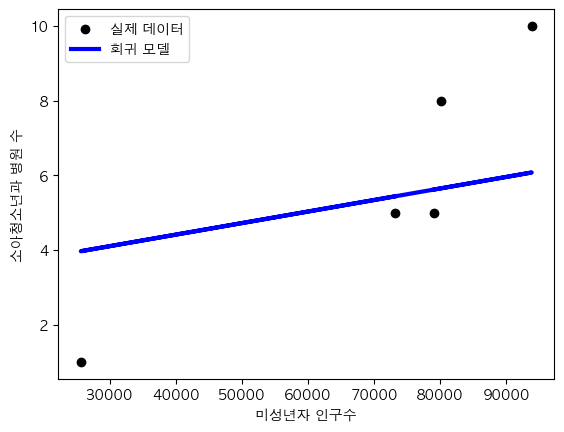

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
plt.rcParams['font.sans-serif']=['AppleGothic']
plt.rcParams['axes.unicode_minus'] = False


X = df[['미성년자인구수']]
y = df['소아청소년과 병원 수']

# 데이터를 훈련 세트와 테스트 세트로 나눔
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 선형 회귀 모델 생성 및 훈련
model = LinearRegression()
model.fit(X_train, y_train)

# 테스트 세트에 대한 예측
y_pred = model.predict(X_test)

# 모델 평가
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Calculate RMSE
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')

# 학습된 모델의 회귀 계수와 절편 확인
print('회귀 계수:', model.coef_)
print('절편:', model.intercept_)

# 시각화
plt.scatter(X_test, y_test, color='black', label='실제 데이터')
plt.plot(X_test, y_pred, color='blue', linewidth=3, label='회귀 모델')
plt.xlabel('미성년자 인구수')
plt.ylabel('소아청소년과 병원 수')
plt.legend()
plt.show()

In [44]:
# 입력값으로 50000을 주고 해당하는 소아청소년과 의원 수를 예측
input_value = [[50000]]
predicted_value = model.predict(input_value)
print(f'입력값 {input_value[0][0]}에 대한 소아청소년과 의원 수 예측: {predicted_value[0]}')


입력값 50000에 대한 소아청소년과 의원 수 예측: 118.98336812211559


/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



In [45]:
# 미성년자 인구수 열을 추출하여 2D 배열로 변환
X_values = df[['미성년자인구수']].values

# 예측값 계산
expectations = model.predict(X_values)

# 결과를 "expectation" 컬럼에 추가
df['expectation'] = expectations

/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



In [46]:
df

,자치구,1인당 총 급여,소아청소년과 병원 수,소아청소년과 의원 수,미성년자인구수,expectation
0,강남구,81053206.0,10,201,93867,194.415200
1,서초구,80510746.0,5,141,76176,163.994507
2,용산구,69795335.0,2,66,27345,80.026791
3,송파구,55703664.0,4,257,106008,215.292349
4,성동구,52498140.0,2,114,38125,98.563622
5,종로구,52233029.0,6,49,17365,62.865607
6,마포구,51249929.0,1,131,51366,121.332284
7,중구,49499323.0,3,59,12773,54.969398
8,양천구,49391500.0,5,101,79006,168.860855
9,영등포구,47450278.0,6,136,48396,116.225198


In [48]:
# expectation - 소아청소년과 의원의 수 => difference 라는 컬럼을 만듦
df['difference'] = df['expectation'] - df['소아청소년과 의원 수']
df

,자치구,1인당 총 급여,소아청소년과 병원 수,소아청소년과 의원 수,미성년자인구수,expectation,difference
0,강남구,81053206.0,10,201,93867,194.415200,-6.584800
1,서초구,80510746.0,5,141,76176,163.994507,22.994507
2,용산구,69795335.0,2,66,27345,80.026791,14.026791
3,송파구,55703664.0,4,257,106008,215.292349,-41.707651
4,성동구,52498140.0,2,114,38125,98.563622,-15.436378
5,종로구,52233029.0,6,49,17365,62.865607,13.865607
6,마포구,51249929.0,1,131,51366,121.332284,-9.667716
7,중구,49499323.0,3,59,12773,54.969398,-4.030602
8,양천구,49391500.0,5,101,79006,168.860855,67.860855
9,영등포구,47450278.0,6,136,48396,116.225198,-19.774802


In [49]:
fig = px.choropleth(df, geojson=geo_json, locations='자치구', color='difference', color_continuous_scale='Blues',)
fig.update_geos(fitbounds="locations", visible=False)
fig.update_layout(title_text='인구수 대비 예상 의원의 수와 실제 의원의 수', title_font_size=20)

# mapbox 설정을 통해 크기 조절
fig.update_layout(
    mapbox=dict(
        style="open-street-map",  # mapbox 스타일 설정
        zoom=10,  # 지도 초기 줌 레벨
        center={"lat": 37.5665, "lon": 126.9780},  # 초기 중심 좌표
    )
)

# 지도 크기 조절
fig.update_layout(height=400, width=600)

# 플롯 표시
fig.show()